[![Lab Documentation and Solutions](https://img.shields.io/badge/Lab%20Documentation%20and%20Solutions-purple)](https://mongodb-developer.github.io/vector-search-lab/)

# Step 1: Setup prerequisites

In [1]:
import os
from pymongo import MongoClient
from utils import track_progress

In [2]:
# If you are using your own MongoDB Atlas cluster, use the connection string for your cluster here
MONGODB_URI = os.environ.get("MONGODB_URI")
# Initialize a MongoDB Python client
mongodb_client = MongoClient(MONGODB_URI)
# Check the connection to the server
mongodb_client.admin.command("ping")

{'ok': 1.0,
 '$clusterTime': {'clusterTime': Timestamp(1751363103, 1),
  'signature': {'hash': b'\xd6c\x0ef\xec\xdf\xb8\xe5\tk\xd3\x1f\xde\xf5\xf7\x06\x11\xc6\xa5\x85',
   'keyId': 7519785284804804615}},
 'operationTime': Timestamp(1751363103, 1)}

In [3]:
# Track progress of key steps-- DO NOT CHANGE
track_progress("cluster_creation", "ai_vs_lab")

Tracking progress for task cluster_creation


# Step 2: Import data into MongoDB

In [4]:
import json

### **Do not change the values assigned to the variables below**

In [5]:
# Database name
DB_NAME = "mongodb_genai_devday_vs"
# Collection name
COLLECTION_NAME = "books"
# Name of the vector search index
ATLAS_VECTOR_SEARCH_INDEX_NAME = "vector_index"

In [6]:
# Connect to the `COLLECTION_NAME` collection.
collection = mongodb_client[DB_NAME][COLLECTION_NAME]

In [7]:
with open("../data/books.json", "r") as data_file:
    json_data = data_file.read()

data = json.loads(json_data)

print(f"Deleting existing documents from the {COLLECTION_NAME} collection.")
collection.delete_many({})
collection.insert_many(data)
print(
    f"{collection.count_documents({})} documents ingested into the {COLLECTION_NAME} collection."
)

Deleting existing documents from the books collection.
50 documents ingested into the books collection.


# Step 3: Generating embeddings

In [8]:
# You may see a warning upon running this cell. You can ignore it.
from sentence_transformers import SentenceTransformer
from PIL import Image
import requests

/home/codespace/.python/current/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [9]:
# Load a multimodal embedding model using the Sentence Transformers library
embedding_model = SentenceTransformer("clip-ViT-B-32")

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


### For images

📚 https://huggingface.co/sentence-transformers/clip-ViT-B-32#usage

In [10]:
image_url = "https://images.isbndb.com/covers/77/44/9780789467744.jpg"
# Load the image from the URL above
image = Image.open(requests.get(image_url, stream=True).raw)
# Embed the `image` using the `embedding_model` instantiated above and return the embedding as a list
# An array can be converted to a list using the `tolist()` method
embedding = embedding_model.encode(image).tolist()

In [11]:
print(embedding)

[0.05800621211528778, -0.01728910207748413, 0.1714736521244049, -0.2501937747001648, 0.4313125014305115, -0.6790053844451904, -0.19027289748191833, 0.512618362903595, -0.04611032083630562, -0.014183316379785538, 0.10228860378265381, -0.04307468235492706, 0.354545533657074, 0.28468355536460876, 0.16752560436725616, -0.36243143677711487, 0.5321717858314514, 0.4250631630420685, -0.09824290871620178, -0.04693806916475296, -0.10108478367328644, 0.2106490433216095, 0.5281314849853516, 0.048847563564777374, -0.48611629009246826, -0.18416133522987366, 0.19519352912902832, 0.025491781532764435, 0.29637354612350464, 0.3302032947540283, -0.2240980714559555, 0.40603137016296387, -0.440698504447937, -0.1951214075088501, -0.59857177734375, -0.8294014930725098, -0.20993053913116455, -0.15705391764640808, -0.6298879981040955, -1.1807336807250977, -0.35689452290534973, -0.205011248588562, 0.13935375213623047, -0.2779814898967743, -0.10266797989606857, 1.4727703332901, -0.02609787881374359, -0.235159337

### For text

In [12]:
text = "Puppy Preschool: Raising Your Puppy Right---Right from the Start!"
# Use the same `embedding_model` to embed a piece of text
embedding = embedding_model.encode(text).tolist()

In [13]:
print(embedding)

[-0.12503160536289215, -0.34212130308151245, -0.265405535697937, 0.012203648686408997, -0.13794107735157013, -0.051292575895786285, 0.4078461527824402, 0.18069614470005035, -0.26146450638771057, -0.370482861995697, -0.6959188580513, -0.17315256595611572, -0.15652354061603546, -0.2016841173171997, 0.05593734234571457, 0.0023418664932250977, -0.5091978907585144, -0.07782110571861267, 0.01800890639424324, 0.20341601967811584, -0.4840427041053772, -0.3236594796180725, 0.6865010857582092, 0.41892433166503906, 0.006406478583812714, -0.03999985754489899, 0.2711701989173889, 0.3239158093929291, -0.1873328983783722, -0.15335270762443542, 0.14605727791786194, -0.06396697461605072, 0.09700702875852585, -0.3382304608821869, -0.5776907205581665, 0.016878560185432434, -0.08471275866031647, 0.1157180517911911, -0.5809030532836914, -0.35574305057525635, 0.10551214963197708, 0.07549676299095154, -0.02413729578256607, 0.09987771511077881, 0.17345869541168213, -0.10375771671533585, 0.1400018185377121, -0

# Step 4: Adding embeddings to existing data in Atlas

In [14]:
from typing import List, Dict, Optional
from tqdm import tqdm

In [15]:
# Field in the documents to embed-- in this case, the book cover
field_to_embed = "cover"
# Name of the embedding field to add to the documents
embedding_field = "embedding"

In [16]:
def get_embedding(content: str, mode: str) -> List[float]:
    """
    Generate embeddings

    Args:
        content (str): Content to embed
        mode (str): Content mode (Can be one of "image" or "text")

    Returns:
        List[float]: Embedding of the content as a list.
    """
    # If an image URL is provided, first load the image
    if mode == "image":
        content = Image.open(requests.get(content, stream=True).raw)
    return embedding_model.encode(content).tolist()

📚 https://www.mongodb.com/docs/manual/tutorial/query-documents/#select-all-documents-in-a-collection

In [17]:
# Query for all documents in the `collection` collection.
results = collection.find({})

📚 **$set:** https://www.mongodb.com/docs/manual/reference/operator/update/set/#syntax

📚 **update_one():** https://www.mongodb.com/docs/manual/reference/method/db.collection.updateOne/#definition

In [20]:
# Update each document in the `collection` collection with embeddings
for result in tqdm(results):
    content = result[field_to_embed]
    # Use the `get_embedding` function defined above to embed the `content`
    # Note that `content` contains the cover image URL for the book 
    embedding = get_embedding(content, "image")

    
    # Filter for the document where the `_id` field is equal to the `_id` of the current document
    filter = {"_id": result["_id"]}
    # Set the `embedding_field` field to the value `embedding` using the `$set` operator
    update = {"$set": {embedding_field: embedding}}
    # Update the documents in the `collection` collection inplace using the `update_one()` operation
    # Get the right document `_id` using the `filter` and apply the `update`
    collection.update_one(filter, update)

50it [00:08,  6.11it/s]


# Step 5: Create a vector search index

In [21]:
from utils import create_index, check_index_ready

In [23]:
# Create vector index definition specifying:
# path: Path to the embeddings field
# numDimensions: Number of embedding dimensions- depends on the embedding model used
# similarity: Similarity metric. One of cosine, euclidean, dotProduct.
model = {
    "name": ATLAS_VECTOR_SEARCH_INDEX_NAME,
    "type": "vectorSearch",
    "definition": {
        "fields": [
            {
                "type": "vector",
                "path": "embedding",
                "numDimensions": 512,
                "similarity": "cosine",
            }
        ]
    },
}

📚 Refer to the `utils.py` script under `notebooks/utils`

In [24]:
# Use the `create_index` function from the `utils` module to create a vector search index with the above definition for the `collection` collection
create_index(collection, ATLAS_VECTOR_SEARCH_INDEX_NAME, model)

Creating the vector_index index


In [25]:
# Use the `check_index_ready` function from the `utils` module to verify that the index was created and is in READY status before proceeding
check_index_ready(collection, ATLAS_VECTOR_SEARCH_INDEX_NAME)

vector_index index status: READY
vector_index index definition: {'fields': [{'type': 'vector', 'path': 'embedding', 'numDimensions': 512, 'similarity': 'cosine'}]}


In [26]:
# Track progress of key steps-- DO NOT CHANGE
track_progress("vs_index_creation", "ai_vs_lab")

Tracking progress for task vs_index_creation


# Step 6: Perform vector search queries

📚 https://www.mongodb.com/docs/atlas/atlas-vector-search/vector-search-stage/#ann-examples (Refer to the "Filter Example")

In [27]:
# Define a function to retrieve relevant documents for a user query using vector search
def vector_search(
    user_query: str, mode: str, filter: Optional[Dict] = {}
) -> None:
    """
    Retrieve relevant documents for a user query using vector search.

    Args:
    user_query (str): The user's query (can be a piece of text or a link to an image)
    mode (str): Query mode (image or text)
    filter (Optional[Dict], optional): Optional vector search pre-filter
    """
    # Generate embedding for the `user_query` using the `get_embedding` function defined in Step 4
    query_embedding = get_embedding(user_query, mode)

    # Define an aggregation pipeline consisting of a $vectorSearch stage, followed by a $project stage
    # Set the number of candidates to 50 and only return the top 5 documents from the vector search
    # Set the `filter` field in the $vectorSearch stage to the value `filter` passed to the function
    # In the $project stage, exclude the `_id` field, include these fields: `title`, `cover`, `year`, `pages`, and the `vectorSearchScore`
    # NOTE: Use variables defined previously for the `index`, `queryVector` and `path` fields in the $vectorSearch stage
    pipeline = [
    {
        "$vectorSearch": {
            "index": ATLAS_VECTOR_SEARCH_INDEX_NAME,
            "queryVector": query_embedding,
            "path": "embedding",
            "numCandidates": 50,
            "filter": filter,
            "limit": 5,
        }
    },
    {"$project": {"_id": 0, "title": 1, "cover": 1, "year":1, "pages":1, "score": {"$meta": "vectorSearchScore"}}},
]

    # Execute the aggregation `pipeline` and store the results in `results`
    results = collection.aggregate(pipeline)

    # Print book title, score, and cover image
    for book in results:
        cover = Image.open(requests.get(book.get("cover"), stream=True).raw).resize((100,150))
        print(f"{book.get('title')}({book.get('year')}, {book.get('pages')} pages): {book.get('score')}")
        display(cover)

Country Living Decorating with Candles: Accents for Every Room(2000, 112 pages): 0.6298907995223999


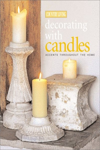

Beauty for Ashes: Receiving Emotional Healing(2003, 272 pages): 0.6147171258926392


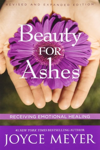

The Secrets of Bach Flower Remedies(2000, 224 pages): 0.6123381853103638


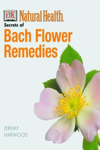

Asia's Best Hotels & Resorts (Insight Guides)(2003, 320 pages): 0.611221969127655


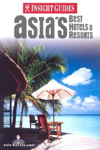

The Cat Who Came for Christmas(1995, 240 pages): 0.609235942363739


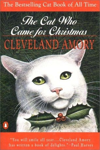

In [28]:
# Test the vector search with a text query
vector_search("A peaceful and uplifting atmosphere", "text")

# Also try these text queries:
# - Healthy living and fitness
# - A man wearing a golden crown
# - Adorable fluffy creatures
# - Winning business agreement
# - A Winter's Tale on a Spanish Isle

The Kid Who Ran for President(1996, 156 pages): 0.7965171933174133


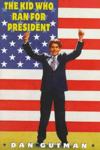

Con Tricks: The Shadowy World of Management Consultancy and How to Make It Work for You (Simon & Schuster Business Books)(1999, 320 pages): 0.7955278158187866


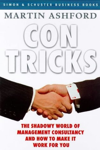

The Color Nature Library: Cats(1984, 64 pages): 0.7899543046951294


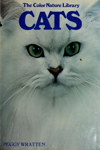

Puppy in a Puddle (Animal Ark Series #28)(2003, 144 pages): 0.784537136554718


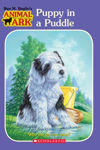

Sea Feather (An Avon Camelot Book)(1999, 74 pages): 0.7820575833320618


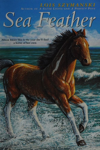

In [29]:
# Test the vector search with an image query
vector_search("https://images.isbndb.com/covers/26/12/9780385412612.jpg", "image")

# Also try these image queries:
# - https://mongodb-developer.github.io/vector-search-lab/img/query-sample/1.png
# - https://mongodb-developer.github.io/vector-search-lab/img/query-sample/2.png
# - https://mongodb-developer.github.io/vector-search-lab/img/query-sample/3.png
# - https://mongodb-developer.github.io/vector-search-lab/img/query-sample/4.png
# - https://mongodb-developer.github.io/vector-search-lab/img/query-sample/5.png

# Step 7: Adding pre-filters to your vector search

### Filter for books that were published after the year `2002`

📚 https://www.mongodb.com/docs/atlas/atlas-vector-search/vector-search-type/#about-the-filter-type

In [30]:
# Modify the vector search index `model` from Step 5 to include the `year` field as a `filter` field
model = {
    "name": ATLAS_VECTOR_SEARCH_INDEX_NAME,
    "type": "vectorSearch",
    "definition": {
        "fields": [
            {
                "type": "vector",
                "path": "embedding",
                "numDimensions": 512,
                "similarity": "cosine",
            },
            {"type": "filter", "path": "year"},
        ]
    },
}

In [31]:
# Use the `create_index` function from the `utils` module to re-create the vector search index with the modified model
create_index(collection, ATLAS_VECTOR_SEARCH_INDEX_NAME, model)

Creating the vector_index index
vector_index index already exists, recreating...
Dropping vector_index index
vector_index index deletion complete
Creating new vector_index index
Successfully recreated the vector_index index


In [32]:
# Use the `check_index_ready` function from the `utils` module to verify that the index has the right filter fields and is in READY status before proceeding
check_index_ready(collection, ATLAS_VECTOR_SEARCH_INDEX_NAME)

vector_index index status: READY
vector_index index definition: {'fields': [{'type': 'vector', 'path': 'embedding', 'numDimensions': 512, 'similarity': 'cosine'}, {'type': 'filter', 'path': 'year'}]}


📚 https://www.mongodb.com/docs/manual/reference/operator/query/gte/#syntax

Beauty for Ashes: Receiving Emotional Healing(2003, 272 pages): 0.6147171258926392


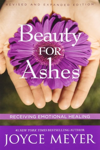

Asia's Best Hotels & Resorts (Insight Guides)(2003, 320 pages): 0.611221969127655


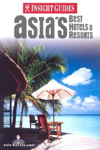

Puppy in a Puddle (Animal Ark Series #28)(2003, 144 pages): 0.6066393852233887


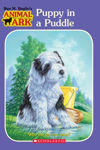

Snowball Oranges: A Winter's Tale on a Spanish Isle(2003, 240 pages): 0.6032916307449341


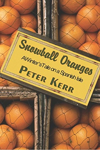

Raising Blaze: A Mother and Son's Long, Strange Journey into Autism(2003, 316 pages): 0.6014822721481323


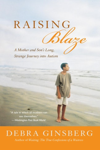

In [33]:
# Create a filter definition to filter for books where the `year` field is greater than `2002` using the `$gte` operator
filter = {"year": {"$gte": 2002}}
# Pass the `filter` as an argument to the `vector_search` function.
# Notice how this filter is incorporated in the `pipeline` in the `vector_search` function.
vector_search("A peaceful and uplifting atmosphere", "text", filter)

### Filter for books that were published after the year `2002` and under `250` pages

📚 https://www.mongodb.com/docs/atlas/atlas-vector-search/vector-search-type/#about-the-filter-type

In [34]:
# Modify the vector search index `model` from Step 5 to include `year` and `pages` as filter fields
model = {
    "name": ATLAS_VECTOR_SEARCH_INDEX_NAME,
    "type": "vectorSearch",
    "definition": {
        "fields": [
            {
                "type": "vector",
                "path": "embedding",
                "numDimensions": 512,
                "similarity": "cosine",
            },
            {"type": "filter", "path": "year"},
            {"type": "filter", "path": "pages"},
        ]
    },
}

In [35]:
# Use the `create_index` function from the `utils` module to re-create the vector search index with the modified model
create_index(collection, ATLAS_VECTOR_SEARCH_INDEX_NAME, model)

Creating the vector_index index
vector_index index already exists, recreating...
Dropping vector_index index
vector_index index deletion complete
Creating new vector_index index
Successfully recreated the vector_index index


In [36]:
# Use the `check_index_ready` function from the `utils` module to verify that the index has the right filter fields and is in READY status before proceeding
check_index_ready(collection, ATLAS_VECTOR_SEARCH_INDEX_NAME)

vector_index index status: READY
vector_index index definition: {'fields': [{'type': 'vector', 'path': 'embedding', 'numDimensions': 512, 'similarity': 'cosine'}, {'type': 'filter', 'path': 'year'}, {'type': 'filter', 'path': 'pages'}]}


📚 https://www.mongodb.com/docs/manual/reference/operator/query/lte/#mongodb-query-op.-lte

Puppy in a Puddle (Animal Ark Series #28)(2003, 144 pages): 0.6066393852233887


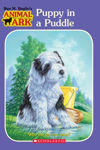

Snowball Oranges: A Winter's Tale on a Spanish Isle(2003, 240 pages): 0.6032916307449341


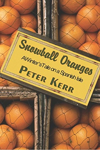

Christmas Crisis (Sabrina, the Teenage Witch)(2003, 160 pages): 0.595951497554779


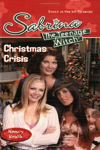

Electric Storm: Magic School Bus Chapter Book #14(2003, 96 pages): 0.5926523208618164


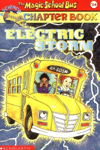

I Do: A Guide to Creating Your Own Unique Wedding Ceremony(2004, 152 pages): 0.5900998115539551


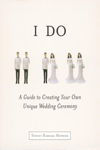

In [38]:
# Create a filter definition to filter for books where the `year` field is greater than or equal to `2002` and the `pages` field is less than or equal to 250
# Use the `$gte` and `$lte` operators
filter = {"$and": [{"year": {"$gte": 2002}}, {"pages": {"$lte": 250}}]}
# Pass the `filter` as an argument to the `vector_search` function.
# Notice how this filter is incorporated in the `pipeline` in the `vector_search` function.
vector_search("A peaceful and uplifting atmosphere", "text", filter)

# Step 8: Changing the similarity metric

📚 https://www.mongodb.com/docs/atlas/atlas-vector-search/vector-search-type/#syntax

In [ ]:
# Modify the vector search index `model` from Step 5 to change the similarity metric to `dotProduct`
model = <CODE_BLOCK_14>

In [ ]:
# Use the `create_index` function from the `utils` module to re-create the vector search index with the modified model
create_index(collection, ATLAS_VECTOR_SEARCH_INDEX_NAME, model)

In [ ]:
# Use the `check_index_ready` function from the `utils` module to verify that the index definition has the correct similarity metric and is in READY status before proceeding
check_index_ready(collection, ATLAS_VECTOR_SEARCH_INDEX_NAME)

In [ ]:
# Perform a vector search
# Note any differences in the results due to the different similarity metric
vector_search("A peaceful and uplifting atmosphere", "text")

# 🦹‍♀️ Enable vector quantization

📚 https://www.mongodb.com/docs/atlas/atlas-vector-search/vector-search-type/#syntax

In [ ]:
# Modify the vector search index `model` from Step 5 to use `scalar` quantization
model = <CODE_BLOCK_15>

In [ ]:
# Use the `create_index` function from the `utils` module to re-create the vector search index with the modified model
create_index(collection, ATLAS_VECTOR_SEARCH_INDEX_NAME, model)

In [ ]:
# Use the `check_index_ready` function from the `utils` module to verify the index was created with quantization enabled
check_index_ready(collection, ATLAS_VECTOR_SEARCH_INDEX_NAME)

# 🦹‍♀️ Hybrid search

In [ ]:
# Name of the full-text search index
ATLAS_FTS_INDEX_NAME = "fts_index"

In [ ]:
# Create full-text search index definition specifying the field mappings
model = {
    "name": ATLAS_FTS_INDEX_NAME,
    "type": "search",
    "definition": {
        "mappings": {"dynamic": False, "fields": {"title": {"type": "string"}}}
    },
}

In [ ]:
# Use the `create_index` function from the `utils` module to create a full-text search index with the above definition for the `collection` collection
create_index(collection, ATLAS_FTS_INDEX_NAME, model)

In [ ]:
# Reset the vector search index to the original vector search index definition
model = {
    "name": ATLAS_VECTOR_SEARCH_INDEX_NAME,
    "type": "vectorSearch",
    "definition": {
        "fields": [
            {
                "type": "vector",
                "path": "embedding",
                "numDimensions": 512,
                "similarity": "cosine",
            }
        ]
    },
}

# Use the `create_index` function from the `utils` module to reset the vector search index to its initial definition.
create_index(collection, ATLAS_VECTOR_SEARCH_INDEX_NAME, model)

In [ ]:
# Use the `check_index_ready` function from the `utils` module to verify that both the indexes were created and are in READY status before proceeding
check_index_ready(collection, ATLAS_VECTOR_SEARCH_INDEX_NAME)
check_index_ready(collection, ATLAS_FTS_INDEX_NAME)

**NOTE:** Refer to our [documentation](https://www.mongodb.com/docs/atlas/atlas-vector-search/tutorials/reciprocal-rank-fusion/#about-the-query) for a detailed explanation of the hybrid search query below.

In [ ]:
def hybrid_search(
    user_query: str, vector_weight: float, full_text_weight: float
) -> None:
    """
    Retrieve relevant documents for a user query using hybrid search.

    Args:
        user_query (str): User query string
        vector_weight (float): Weight of vector search in the final search results
        full_text_weight (float): Weight of full-text search in the final search results
    """
    pipeline = [
        # Vector search stage
        {
            "$vectorSearch": {
                "index": ATLAS_VECTOR_SEARCH_INDEX_NAME,
                "path": "embedding",
                "queryVector": get_embedding(user_query, "text"),
                "numCandidates": 50,
                "limit": 10,
            }
        },
        # Group all documents returned by the vector search into a single array named `docs`
        {"$group": {"_id": None, "docs": {"$push": "$$ROOT"}}},
        # Unwinds the array of documents in the `docs` field and stores the position of the document in the `docs` array, in a field named `rank`
        {"$unwind": {"path": "$docs", "includeArrayIndex": "rank"}},
        # Adds a new field named `vs_score` that contains the reciprocal rank score for each document in the `docs` array
        {
            "$addFields": {
                "vs_score": {
                    "$multiply": [
                        vector_weight,
                        {"$divide": [1.0, {"$add": ["$rank", 60]}]},
                    ]
                }
            }
        },
        # Includes only the fields `_id`, `title`, and `cover` and the `vs_score` in the results
        {
            "$project": {
                "vs_score": 1,
                "_id": "$docs._id",
                "title": "$docs.title",
                "cover": "$docs.cover",
            }
        },
        # Union with a full-text search stage
        {
            "$unionWith": {
                "coll": COLLECTION_NAME,
                "pipeline": [
                    # Full-text search
                    {
                        "$search": {
                            "index": ATLAS_FTS_INDEX_NAME,
                            "text": {"query": user_query, "path": "title"},
                        }
                    },
                    # Limits the number of documents returned by the full-text search to 10
                    {"$limit": 10},
                    # Group all documents returned by the full-text search into a single array named `docs`
                    {"$group": {"_id": None, "docs": {"$push": "$$ROOT"}}},
                    # Unwinds the array of documents in the `docs` field and stores the position of the document in the `docs` array, in a field named `rank`
                    {"$unwind": {"path": "$docs", "includeArrayIndex": "rank"}},
                    # Adds a new field named `fts_score` that contains the reciprocal rank score for each document in the `docs` array
                    {
                        "$addFields": {
                            "fts_score": {
                                "$multiply": [
                                    full_text_weight,
                                    {"$divide": [1.0, {"$add": ["$rank", 60]}]},
                                ]
                            }
                        }
                    },
                    # Includes only the fields `_id`, `title`, and `cover` and the `fts_score` in the results
                    {
                        "$project": {
                            "fts_score": 1,
                            "_id": "$docs._id",
                            "title": "$docs.title",
                            "cover": "$docs.cover",
                        }
                    },
                ],
            }
        },
        # The following stages combine the results from vector and full-text search into a single ranked list
        # Groups the documents in the results from the preceding stages by `title`, `vs_score`, and `fts_score`
        {
            "$group": {
                "_id": "$_id",
                "title": {"$first": "$title"},
                "vs_score": {"$max": "$vs_score"},
                "fts_score": {"$max": "$fts_score"},
                "cover": {"$first": "$cover"},
            }
        },
        # Includes only the fields `_id`, `title`, `cover`, `vs_score` and `fts_score` in the results
        {
            "$project": {
                "_id": 1,
                "title": 1,
                "vs_score": {"$ifNull": ["$vs_score", 0]},
                "fts_score": {"$ifNull": ["$fts_score", 0]},
                "cover": 1,
            }
        },
        # Adds a field named `score` that contains the sum of `vs_score` and `fts_score` to the results
        {
            "$project": {
                "score": {"$add": ["$fts_score", "$vs_score"]},
                "_id": 1,
                "title": 1,
                "vs_score": 1,
                "fts_score": 1,
                "cover": 1,
            }
        },
        # Sorts the results by descending order of `score`
        {"$sort": {"score": -1}},
        # Limits the output to 5 results only
        {"$limit": 5},
    ]

    results = collection.aggregate(pipeline)

    # Print book title, scores, and cover image
    for book in results:
        cover = Image.open(requests.get(book["cover"], stream=True).raw).resize(
            (100, 150)
        )
        print(
            f"{book.get('title')}, VS Score: {book.get('vs_score')}, FTS Score: {book.get('fts_score')}"
        )
        display(cover)

In [ ]:
# Test the hybrid search query with a weight of 1.0 for vector search and 0.0 for full-text search
hybrid_search(
    user_query="A Winter's Tale on a Spanish Isle",
    vector_weight=1.0,
    full_text_weight=0.0,
)

In [ ]:
# Test the hybrid search query with a weight of 0.5 for vector search and 0.5 for full-text search
hybrid_search(
    user_query="A Winter's Tale on a Spanish Isle",
    vector_weight=0.5,
    full_text_weight=0.5,
)